In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from getdist import plots, MCSamples
import numpy as np
import zeus
print('zeus version:', zeus.__version__)

zeus version: 0.9.3


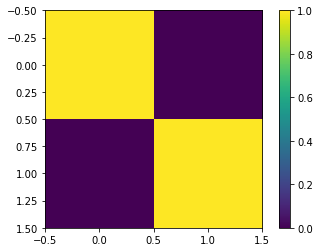

In [7]:
ndim = 2
nwalkers = 2*ndim
nsteps= 1000

#C = make_spd_matrix(ndim)
C = np.identity(ndim)
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

#mu = np.random.rand(ndim) * 100.0
mu  = np.zeros(ndim)

def logp(x, mu, icov):
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

#start = np.random.rand(ndim)
start = mu + 3.0 * np.random.randn(nwalkers,ndim)

In [8]:
sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov])
sampler.run(start, nsteps)

Starting sampling...
100%|██████████| 1000/1000 [00:00<00:00, 4808.65it/s]
Sampling Complete!


In [14]:
#sampler.reset()
sampler.run(sampler.last, nsteps)

Starting sampling...
100%|██████████| 1000/1000 [00:00<00:00, 4473.38it/s]
Sampling Complete!


In [15]:
sampler.summary

Summary
-------
Number of Generations: 4000
Number of Parameters: 2
Number of Walkers: 4
Mean Integrated Autocorrelation Time: 7.25
Effective Sample Size: 2207.67
Number of Log Probability Evaluations: 32891
Effective Samples per Log Probability Evaluation: 0.067121


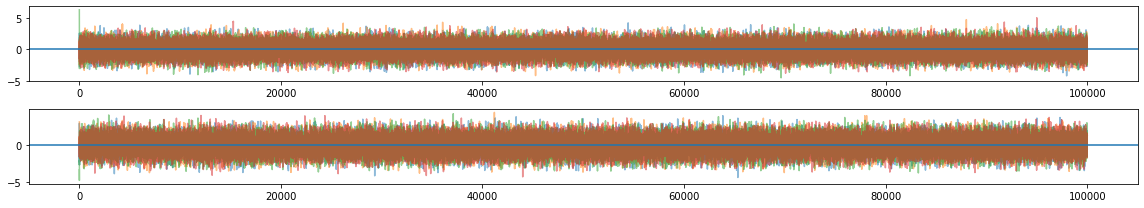

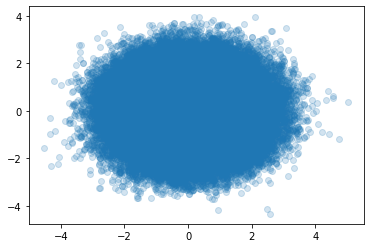

Summary
-------
Number of Generations: 100000
Number of Parameters: 2
Number of Walkers: 4
Mean Integrated Autocorrelation Time: 7.16
Effective Sample Size: 55851.36
Number of Log Probability Evaluations: 828160
Effective Samples per Log Probability Evaluation: 0.06744


MCMC mean: [-0.00335798  0.00748791]
TRUE mean: [0. 0.]
MCMC std: [1.00287348 0.99938558]
TRUE std: [1. 1.]


In [4]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(nsteps),sampler.chain[:,:,n].T,alpha=0.5)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace = sampler.flatten(burn=int(nsteps/2))
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()

print('MCMC mean:', np.mean(trace, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))

sampler.summary

In [ ]:
print('Percentiles')
print (np.percentile(trace, [16, 50, 84], axis=0))
print('Mean')
print (np.mean(trace, axis=0))
print('Standard Deviation')
print (np.std(trace, axis=0))

In [ ]:
sample = MCSamples(samples=trace)
g = plots.getSubplotPlotter(width_inch=14)
g.triangle_plot([sample], filled=True, shaded=False)